In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Dell\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [3]:
import tensorflow as tf

In [4]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!','.']
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [5]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [6]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(documents), "documents")


190 documents


In [7]:
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)

72 classes ['goodbye', 'greeting', 'noanswer', 'question1', 'question10', 'question11', 'question12', 'question13', 'question14', 'question15', 'question16', 'question17', 'question18', 'question19', 'question2', 'question20', 'question21', 'question22', 'question23', 'question24', 'question25', 'question26', 'question27', 'question28', 'question29', 'question3', 'question30', 'question31', 'question32', 'question33', 'question34', 'question35', 'question36', 'question37', 'question38', 'question39', 'question4', 'question40', 'question41', 'question42', 'question43', 'question44', 'question45', 'question46', 'question47', 'question48', 'question49', 'question5', 'question50', 'question51', 'question52', 'question53', 'question54', 'question55', 'question56', 'question57', 'question58', 'question59', 'question6', 'question60', 'question61', 'question62', 'question63', 'question64', 'question65', 'question66', 'question67', 'question68', 'question7', 'question8', 'question9', 'thanks']


In [8]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))


In [9]:
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [10]:
random.shuffle(training)
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90 and logs.get('loss')<0.40):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
model = Sequential()
model.add(Dense(132, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 132)               48444     
_________________________________________________________________
dropout_1 (Dropout)          (None, 132)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 38)                5054      
_________________________________________________________________
dropout_2 (Dropout)          (None, 38)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 72)                2808      
Total params: 56,306
Trainable params: 56,306
Non-trainable params: 0
_________________________________________________________________


In [13]:
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=1500, batch_size=5, verbose=1,callbacks=[callbacks])
model.save('chatbot.h5', hist)

print("model created")


Epoch 1/1500
190/190 [==============================] - 1s 4ms/step - loss: 4.3107 - accuracy: 0.0053
Epoch 2/1500
190/190 [==============================] - 0s 2ms/step - loss: 4.2588 - accuracy: 0.0316
Epoch 3/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.2441 - accuracy: 0.0474
Epoch 4/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.2109 - accuracy: 0.0421
Epoch 5/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.1734 - accuracy: 0.0789
Epoch 6/1500
190/190 [==============================] - 0s 2ms/step - loss: 4.1636 - accuracy: 0.0684
Epoch 7/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.1187 - accuracy: 0.0579
Epoch 8/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.0270 - accuracy: 0.1000
Epoch 9/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.0337 - accuracy: 0.0947
Epoch 10/1500
190/190 [==============================] - 0s 1ms/step - loss: 3.96

190/190 [==============================] - 0s 511us/step - loss: 1.0652 - accuracy: 0.6368
Epoch 77/1500
190/190 [==============================] - ETA: 0s - loss: 0.9920 - accuracy: 0.73 - 0s 363us/step - loss: 1.0076 - accuracy: 0.7053
Epoch 78/1500
190/190 [==============================] - 0s 374us/step - loss: 1.0624 - accuracy: 0.6737
Epoch 79/1500
190/190 [==============================] - 0s 369us/step - loss: 0.9650 - accuracy: 0.7053
Epoch 80/1500
190/190 [==============================] - 0s 363us/step - loss: 1.1005 - accuracy: 0.6632
Epoch 81/1500
190/190 [==============================] - 0s 411us/step - loss: 1.1255 - accuracy: 0.6789
Epoch 82/1500
190/190 [==============================] - 0s 390us/step - loss: 1.0108 - accuracy: 0.6632
Epoch 83/1500
190/190 [==============================] - 0s 395us/step - loss: 1.0199 - accuracy: 0.7105
Epoch 84/1500
190/190 [==============================] - 0s 369us/step - loss: 0.9796 - accuracy: 0.6895
Epoch 85/1500
190/190 [====

190/190 [==============================] - 0s 395us/step - loss: 0.6344 - accuracy: 0.8000
Epoch 153/1500
190/190 [==============================] - 0s 374us/step - loss: 0.5843 - accuracy: 0.8526
Epoch 154/1500
190/190 [==============================] - 0s 379us/step - loss: 0.6506 - accuracy: 0.8105
Epoch 155/1500
190/190 [==============================] - 0s 374us/step - loss: 0.6075 - accuracy: 0.8000
Epoch 156/1500
190/190 [==============================] - 0s 379us/step - loss: 0.7838 - accuracy: 0.7526
Epoch 157/1500
190/190 [==============================] - 0s 364us/step - loss: 0.5700 - accuracy: 0.8000
Epoch 158/1500
190/190 [==============================] - 0s 379us/step - loss: 0.5666 - accuracy: 0.8474
Epoch 159/1500
190/190 [==============================] - 0s 390us/step - loss: 0.6676 - accuracy: 0.7684
Epoch 160/1500
190/190 [==============================] - 0s 400us/step - loss: 0.7618 - accuracy: 0.7421
Epoch 161/1500
190/190 [==============================] - 0s 

190/190 [==============================] - 0s 374us/step - loss: 0.4446 - accuracy: 0.8579
Epoch 230/1500
190/190 [==============================] - 0s 358us/step - loss: 0.5586 - accuracy: 0.8053
Epoch 231/1500
190/190 [==============================] - 0s 358us/step - loss: 0.5567 - accuracy: 0.8158
Epoch 232/1500
190/190 [==============================] - 0s 369us/step - loss: 0.7100 - accuracy: 0.8000
Epoch 233/1500
190/190 [==============================] - 0s 363us/step - loss: 0.4388 - accuracy: 0.8684
Epoch 234/1500
190/190 [==============================] - 0s 369us/step - loss: 0.5885 - accuracy: 0.8000
Epoch 235/1500
190/190 [==============================] - 0s 358us/step - loss: 0.4550 - accuracy: 0.8526
Epoch 236/1500
190/190 [==============================] - 0s 369us/step - loss: 0.6724 - accuracy: 0.7895
Epoch 237/1500
190/190 [==============================] - 0s 421us/step - loss: 0.6643 - accuracy: 0.7789
Epoch 238/1500
190/190 [==============================] - 0s 

190/190 [==============================] - 0s 448us/step - loss: 0.5077 - accuracy: 0.8158
Epoch 307/1500
190/190 [==============================] - 0s 427us/step - loss: 0.5695 - accuracy: 0.8263
Epoch 308/1500
190/190 [==============================] - 0s 421us/step - loss: 0.4605 - accuracy: 0.8526
Epoch 309/1500
190/190 [==============================] - 0s 432us/step - loss: 0.4897 - accuracy: 0.8526
Epoch 310/1500
190/190 [==============================] - 0s 427us/step - loss: 0.5587 - accuracy: 0.8158
Epoch 311/1500
190/190 [==============================] - 0s 485us/step - loss: 0.5045 - accuracy: 0.8368
Epoch 312/1500
190/190 [==============================] - 0s 427us/step - loss: 0.4836 - accuracy: 0.8632
Epoch 313/1500
190/190 [==============================] - 0s 427us/step - loss: 0.3919 - accuracy: 0.8895
Epoch 314/1500
190/190 [==============================] - 0s 421us/step - loss: 0.4501 - accuracy: 0.8579
Epoch 315/1500
190/190 [==============================] - 0s 

190/190 [==============================] - 0s 384us/step - loss: 0.5714 - accuracy: 0.8421
Epoch 384/1500
190/190 [==============================] - 0s 358us/step - loss: 0.4167 - accuracy: 0.8316
Epoch 385/1500
190/190 [==============================] - 0s 358us/step - loss: 0.3031 - accuracy: 0.8947
Epoch 386/1500
190/190 [==============================] - 0s 353us/step - loss: 0.3028 - accuracy: 0.9211

Reached 90% accuracy so cancelling training!
model created


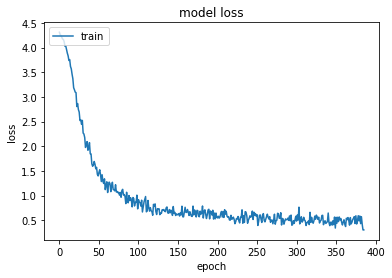

In [15]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
from keras.models import load_model
model = load_model('chatbot.h5')
import json
import random
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [17]:
def clean_up_sentence(sentence):
    sent_words = nltk.word_tokenize(sentence)
    sent_words = [lemmatizer.lemmatize(word.lower()) for word in sent_words]
    return sent_words

In [18]:
def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [19]:
def predict_class(sentence, model):
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.30
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [20]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

In [21]:
flag=True
resp = []
while(flag==True):
    try:
        res = input('You: ')
        if res=="quit" or res=="stop" or res=='Quit' or res=="Stop":
            flag=False
            print("Bot: Okay")
        else:
            print('Bot:',chatbot_response(res))
    except Exception:
        print("Bot: Sorry I can't understand")


You: hello
Bot: Hello, thanks for asking
You: hey there
Bot: Good to see you again
You: i can't enter the lp1
Bot: Ensure you're using the right token
You: tell me about work report
Bot: As mentioned in the video, please write what you have done this week and request approval from your supervisor by clicking on send to supervisor.
You: can't access the quiz
Bot: Please retry after some time in an incognito window
You: how to resume task of learning path
Bot: You can go back to that task and then click on More and then resume to restart that task
You: i want to switch technology
Bot: You cannot switch the technology currently. You have to continue with the one you are selected for. In the case of multiple form entries, you just got selected for one of them; the first one that you entered. You cannot make a switch right now
You: thanks
Bot: Any time!
You: quit
Bot: Okay
